2017-07-13 15:20:54.001000
Now Plotting Errors
Array saved to disk


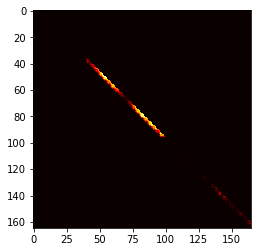

Plot Saved to Disk


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import similaritymetrics as ims
import datetime
import math

def plotError(frameCount, extraDiag):
    print "Now plotting errors"
    #Create our array of zeros as a 2D numpy array
    errors = np.zeros((frameCount, frameCount))
    #Now Populate our 2 Diagonal Errors
    #Current structure allows image0 loaded once and reused
    for i in range(0, frameCount):
        image1 = cv2.imread("frame%0*d.png" %(4,i))
        image2 = cv2.imread("frame%0*d.png" %(4,i+1))
        #First Diagonal is y=x+1
        errors[i, i+1]=ims.dssimCompare(image1, image2)
        #Second Diagonal is y=x+2
        #This loop calls our extra diagonals for however many we specify
        #We need to add guarding here to prevent looking for an image that extends beyond available frames
        for j in range(0, extraDiag):
            image2 = cv2.imread("frame%0*d.png" %(4,i+3+j))
            #null pointer type exception
            if(image2 is None):
                continue
            errors[i, i+2+j]=ims.dssimCompare(image1, image2)    
    #Save our array
    np.savetxt('array.txt', errors)
    print "Array saved to disk"
    #Now plot and we need a way to save our plot
    plt.imshow(errors, cmap='hot', interpolation='nearest')
    plt.show()
    plt.savefig("errorplot.png")
    print "Plot Saved to Disk"
    
def plotErrorDict(frameCount, extraDiag):
    print "Now Plotting Errors"
    errors = np.zeros((frameCount, frameCount))
    #Create Dictionary with initial items
    imagedict = {}
    for i in range(0, frameCount):
        #Add Entries to Dictionary, only add a single entry when i>1
        if(i>0):
            imagedict["{0}".format(i+extraDiag+1)]= cv2.imread("frame%0*d.png" %(4,i+extraDiag+1))
        else:
            for j in range(i, extraDiag+2):   
                imagedict["{0}".format(j)]= cv2.imread("frame%0*d.png" %(4,j))
        #Then Compare
        for k in range(i+1, i+extraDiag+2):
            if(imagedict["%d" %(k)] is None):
                continue
            errors[i,k] = ims.mse(imagedict["%d" %(i)],imagedict["%d" %(k)])
        #Then delete as needed, we'll delete the earliest created entry
        del imagedict["%d" %(i)]
    np.savetxt('array.txt', errors)
    print "Array saved to disk"
    #Now plot and we need a way to save our plot
    plt.imshow(errors, cmap='hot', interpolation='nearest')
    plt.show()
    plt.savefig("errorplot.png")
    print "Plot Saved to Disk"
    
#Main Function
#By this unscientific timing the first algo takes 24 seconds and the dictionary based approach is 16 seconds. So roughly 33% quicker
#Repeated with dSSIM we have 7min 6sec and 6min 42 sec. Likely due to the fact that the increase is due to dSSIM being more costly
#int datetime.datetime.utcnow()
#plotError(165, 6)
print datetime.datetime.utcnow()
plotErrorDict(165, 3)
